#Install and Import the necessary libraries

##installing slycot and control libraries

In [5]:
pip install slycot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for slycot: filename=slycot-0.6.0-cp310-cp310-linux_x86_64.whl size=2020820 sha256=fd89b32b2809ad3297b743761820078a7b32f45306357cd1720c730188d2385c
  Stored in directory: /root/.cache/pip/wheels/92/04/62/2a104561c1b308a0768efe2e11d1e424c4419ee3ce1185dd5c
Successfully built slycot


base on what has been mentioned in the web, [some functionality is limited or absent without slycot; ](https://python-control.readthedocs.io/en/0.10.1/intro.html#:~:text=Many%20parts%20of%20python%2Dcontrol%20will%20work%20without%20slycot%2C%20but%20some%20functionality%20is%20limited%20or%20absent%2C%20and%20installation%20of%20slycot%20is%20recommended.) therefore it is recommended.

In [2]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.5 MB/s eta 0:00:00


##Importing libraries

In [17]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

#Plotting Function:

In [19]:
def plotting_Function(x_Axis, y_Axis, x_Label, y_Label, title, file_name):
    plt.figure(figsize=(8, 6))
    plt.plot(x_Axis, y_Axis, color = 'blue', linewidth = 4)
    plt.title(title, fontsize = 14)
    plt.xlabel(x_Label, fontsize = 14)
    plt.ylabel(y_Label, fontsize = 14)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.grid(visible = True)
    plt.savefig(file_name, dpi = 600)
    plt.show()

#Transfer Function

just like the matlab, we have to define num and den; after defining these two arrays, we can have the transfer function of our system:

In [5]:
num = [4]
den =  [1, 2*2, 4]

In [6]:
sys = ct.tf(num, den)

In [7]:
type(sys)
sys

TransferFunction(array([4]), array([1, 4, 4]))

#Simulation of step response

the most important point is to define a time vector:

In [22]:
time_vector = np.linspace(0, 10, 1000)

in order to find the step response we have to use

**ct.step_response(transfer function, time_vector)**

In [23]:
timeReturned, systemOutput = ct.step_response(sys, time_vector)

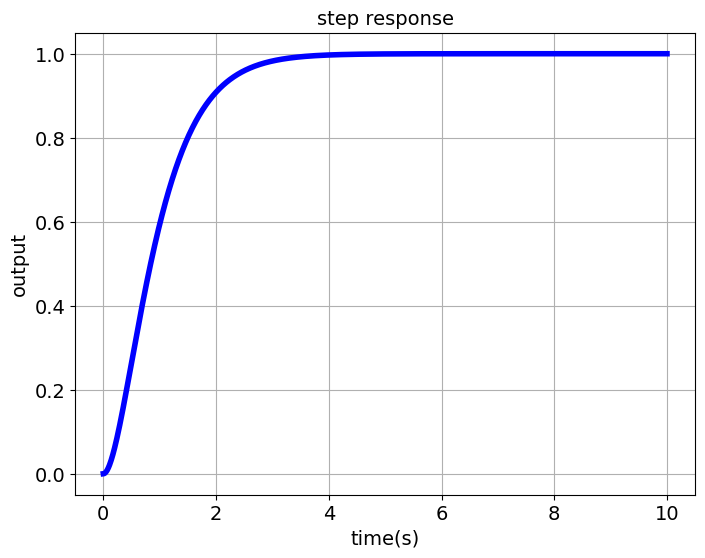

In [24]:
plotting_Function(timeReturned, systemOutput, 'time(s)', 'output', 'step response', 'step_response.png')

In [25]:
num = [1]
den =  [1, 2, 4]
sys_2 = ct.tf(num, den)

In [26]:
time_Returned_2, systemOutput_2 = ct.step_response(sys_2, time_vector)

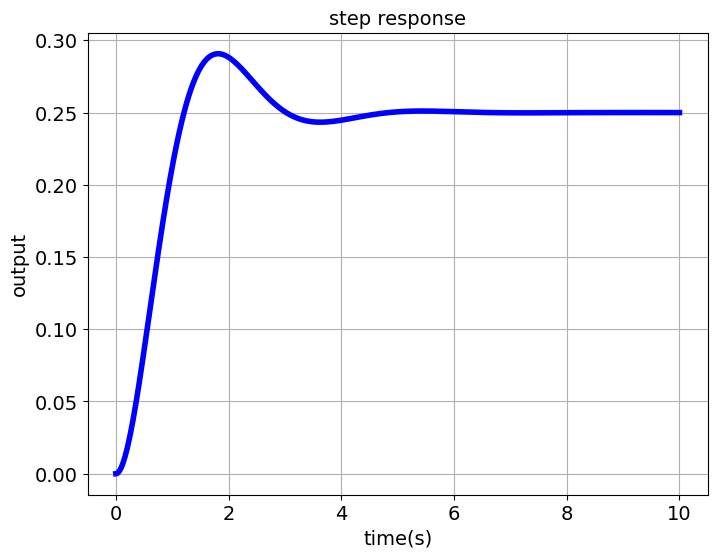

In [27]:
plotting_Function(time_Returned_2, systemOutput_2, 'time(s)', 'output', 'step response', 'step_response_2.png')

[Response to the other inputs](https://python-control.readthedocs.io/en/0.10.1/conventions.html#simulating-lti-systems:~:text=and%20tf2ss().-,Simulating%20LTI%20systems,-%EF%83%81)

#The step response information

Again, like matlab we use step_info:

In [29]:
response_info = ct.step_info(sys_2)

In [30]:
response_info

{'RiseTime': 0.8373036701796529,
 'SettlingTime': 4.046967739201656,
 'SettlingMin': 0.23487229056187942,
 'SettlingMax': 0.2907583732260491,
 'Overshoot': 16.303349290419632,
 'Undershoot': 0,
 'Peak': 0.2907583732260491,
 'PeakTime': 1.8141579520559146,
 'SteadyStateValue': 0.25}

##Define a Function in order to plot the step response with info like overshoot, Settling time, peaktime, etc.

In [48]:
def plot_response_info(info, x_Axis, y_Axis, x_Label, y_Label, title, file_name):
    plt.figure(figsize=(8, 6))
    plt.plot(x_Axis, y_Axis, color = 'blue', linewidth = 4)

    plt.axhline(info['Peak'], color='purple', linestyle=':', label=f'Overshoot = {info["Overshoot"]:.3f}%')

    plt.axvline(info['RiseTime'], color='green', linestyle='--', label=f'RiseTime = {info["RiseTime"]:.3f}s')

    plt.scatter(info['PeakTime'], info['Peak'], color='blue', label=f'Peak = {info["Peak"]:.3f} at t = {info["PeakTime"]:.3f}s')

    plt.axvline(info['SettlingTime'], color='orange', linestyle='--', label=f'SettlingTime = {info["SettlingTime"]:.3f}s')

    plt.axhline(info['SteadyStateValue'], color = 'red', linestyle = '--', label = f'SteadyStateValue = {info["SteadyStateValue"]:.3f}')

    plt.title(title, fontsize = 14)
    plt.xlabel(x_Label, fontsize = 14)
    plt.ylabel(y_Label, fontsize = 14)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.grid(visible = True)
    plt.legend(fontsize=12)
    plt.savefig(file_name, dpi = 600)
    plt.show()


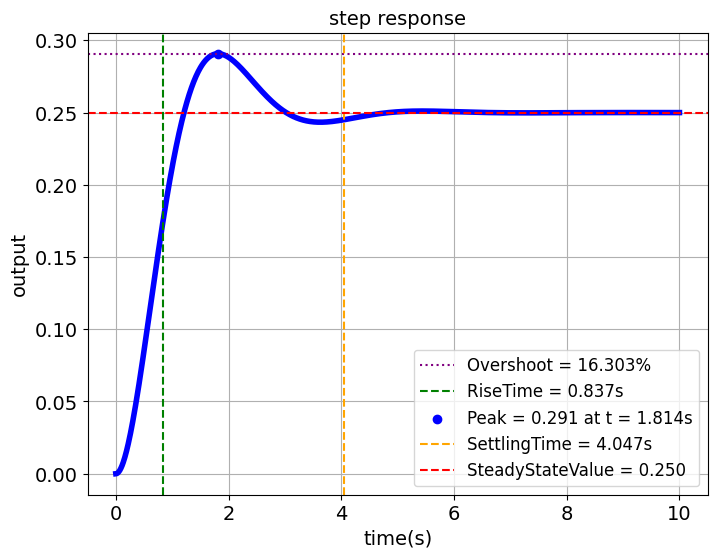

In [49]:
plot_response_info(response_info, time_Returned_2, systemOutput_2, 'time(s)', 'output', 'step response', 'step_response_2.png')
